##  타입 확인 함수 

In [2]:
use std::any::type_name;

fn type_of<T>(_: T) -> &'static str {
    type_name::<T>()
}

## 1. 벡터 


## 벡터의 구성 

### 벡터는 힙(heap)에 메모리를 할당하고, 필요에 따라 크기가 조정됩니다.
- 배열은 스택(stack)에 메모리를 할당하고, 고정된 크기를 가집니다.
- 따라서 벡터는 보다 유연한 메모리 할당을 제공하고, 배열은 고정된 크기를 유지하는 데 효율적입니다.

### 크기: 
- 벡터는 동적으로 크기를 조정할 수 있지만, 배열은 고정된 크기를 가지며 변경할 수 없습니다.
- 배열의 크기는 컴파일 타임에 결정되고, 벡터는 런타임에 크기가 동적으로 조정될 수 있습니다.

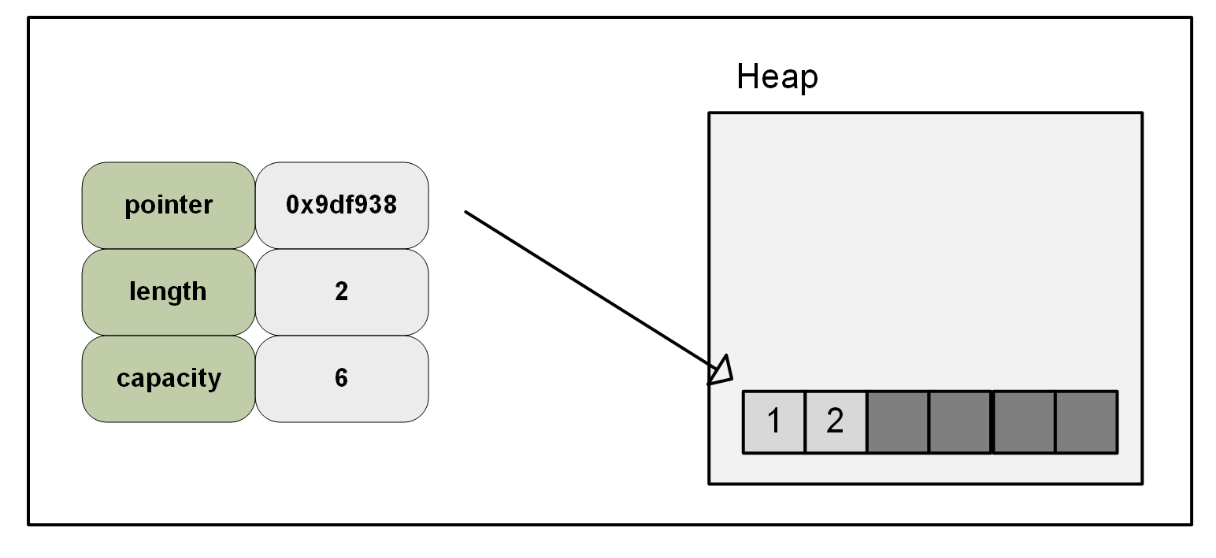

## 벡터의 소유권과 반복자 처리 

### 소유권과 복사: 
- 벡터는 소유권과 복사가 가능합니다. 벡터는 동적으로 크기가 조정되기 때문에 소유권을 이전하거나 복제할 수 있습니다. 
- 배열은 고정된 크기를 가지기 때문에 소유권과 복제가 불가능합니다. 
- 대신, 배열의 데이터는 스택에 직접 저장되어 소유권 이전이나 복사 없이 사용할 수 있습니다.

### 반복자: 
- 벡터는 iter() 메서드를 통해 반복자를 제공하며, 동적으로 크기가 조정된 데이터에 접근할 수 있습니다. 
- 배열은 길이와 타입이 정적으로 알려져 있기 때문에, iter() 메서드를 호출하지 않고도 인덱스를 사용하여 직접 요소에 접근할 수 있습니다.

###  벡터와 배열의 타입 정의 방식 

#### 벡터(Vec\<T\>) 
- 벡터는 제너릭 타입을 < > 사이에 지정


#### 배열([T; N])
- 배열은 대괄호내에 타입과 길이를 지정


##  1-1 벡터 정의 

### 벡터 매크로로 정의 
- 간편 정의 vec! 매크로에 대괄호를 사용해서 벡터 인스턴스 생성

### 벡터 연관함수로 정의 
- Vec::new 를 사용해서 벡터 인스턴스 생성 

In [6]:
fn main() { 

    let v1 = vec![1, 2, 3];                    // 매크로로 벡터 만들기 
    println!(" v1={:?}", v1);
    println!(" 매크로 생성한 vector type {}", type_of(v1));
 
    let mut v2: Vec<i32> = Vec::<i32>::new();   // 연관함수로 빈벡터  벡터의 원소를 추가하려면 mut 사용해야 함 
    v2.push(5);
    v2.push(6);
    v2.push(7);
    println!(" v2={:?}", v2);
    println!(" 연관함수로 생성한 vector type {}", type_of(v2));
}

main();

 v1=[1, 2, 3]
 매크로 생성한 vector type alloc::vec::Vec<i32>
 v2=[5, 6, 7]
 연관함수로 생성한 vector type alloc::vec::Vec<i32>


## 1-2 벡터의 원소 추가 하기 

- 벡터는 가변이므로 원소 갱신과 추가가 가능하다.
- 빈 벡터를 만들고 메서드로 원소를 추가 삭제할 수 있다.

In [8]:
fn main() {
    let mut v = Vec::new();

    v.push(5);
    v.push(6);
    v.push(7);
    v.push(8);
    println!(" v={:?}", v);
    v.pop();
    println!(" v={:?}", v);
} 

main();

 v=[5, 6, 7, 8]
 v=[5, 6, 7]


## 1-3  벡터의 원소 검색 하기

- 인덱스 검색연산자를 사용하거나 메서드 get으로 처리
- get으로 처리할 경우 없을 경우는 None으로 반환 처리

In [7]:

fn main() {
    let mut v = vec![1, 2, 3, 4, 5];         // 변경가능한 벡터를 매크로로 정의 

    let third  = v[2];                       // 벡터에서 3번째 것을 조회한 후에 변수에 할당.  정수라서 복사가 됨 
    println!(" third : {}", third);
    println!(" {:?} {:?}  ", v.pop(), v.pop());
    println!(" {:?} ", v);
    //let f  = v[3];
    let third_1: Option<&i32> = v.get(3);    //  get 메서드로 조회 후에 할당   참조를 전달함 
    println!(" third_1 : {:?}", third_1);
}

main();

 third : 3
 Some(5) Some(4)  
 [1, 2, 3] 
 third_1 : None


### 인덱스 검색할 때 인덱스 범위가 벗어나면 예외를 발생한다. 

In [6]:
fn main() {
    let v = vec![1, 2, 3, 4, 5];

    let does_not_exist = &v[100];              // 인덱스 벗어난 경우 에러 발생 
    let does_not_exist = v.get(100);
}

main();

thread '<unnamed>' panicked at 'index out of bounds: the len is 5 but the index is 100', src/lib.rs:5:27
stack backtrace:
   0: _rust_begin_unwind
   1: core::panicking::panic_fmt
   2: core::panicking::panic_bounds_check
   3: ctx::main
   4: _run_user_code_5
   5: evcxr::runtime::Runtime::run_loop
   6: evcxr::runtime::runtime_hook
   7: evcxr_jupyter::main
note: Some details are omitted, run with `RUST_BACKTRACE=full` for a verbose backtrace.


### get 메서드 조회할 때는 

In [11]:
fn main() {
    let v = vec![1, 2, 3, 4, 5];

    //let does_not_exist = &v[100];              // 인덱스 벗어난 경우 에러 발생 
    let does_not_exist = v.get(100);             // 인덱스 벗어난 경우  None 처리
    println!("{does_not_exist:?}");
}

main();

None


## 1-4 벡터에 대한 변경 및 추가 

- 변경가능한 참조를 사용해서 벡터의 값을 변경 

In [20]:
fn main() {
    let v = vec![100, 32, 57];   
    for i in &v {                      // 벡터 원소 순환 처리 
        println!("{}", i);
    }
    println!(" 벡터 : {:?}", v);
    
    let mut v = vec![100, 32, 57];     // 벡터 내부 값 변경  
    for i in  v.iter_mut() {
        *i += 50;
    }

    println!(" 벡터 : {:?}", v);
}

main();

100
32
57
 벡터 : [100, 32, 57]
 벡터 : [150, 82, 107]


### 벡터 원소 추가하기 

In [13]:
fn main() {

    
    let mut v3 = vec![100, 32, 57];     // 벡터 내부 값 변경  
    v3.push(33);

    println!(" 벡터 : {:?}", v3);
}

main();

 벡터 : [100, 32, 57, 33]


## 1-5  벡터의 원소는 소유권이 이전된다. 

- 벡터의 원소도 이동이 되므로 순환을 실행하면 값이 이동이 발생

In [21]:
fn main() {
    let mut v2 = vec![100, 32, 57];
    for i in  v2.into_iter() {
        println!("{}", i);
    }
    println!(" 벡터 : {:?}", v2);
}

main();

Error: borrow of moved value: `v2`

### 참조를 사용하지 않고 백터를 순환하려면 반복자로 변환

- 반복자로 변환하면 자동으로 참조가 된다. 
- 반복자를 만들어서 처리
- 또한 인덱스와 값을 처리할 때는 iter().enumerate()까지 사용

In [10]:
fn main() { 
    let v1 = vec![1, 2, 3];
    for val in v1.iter() {
        println!("Got: {}", val);
    }
    //  키와 값 쌍을 반환하므로 구조분해를 사용해서 처리 
    for (ind,val) in v1.iter().enumerate() {
        println!("index : {}, value : {}", ind, val);
    }
}
main()

Got: 1
Got: 2
Got: 3
index : 0, value : 1
index : 1, value : 2
index : 2, value : 3


()

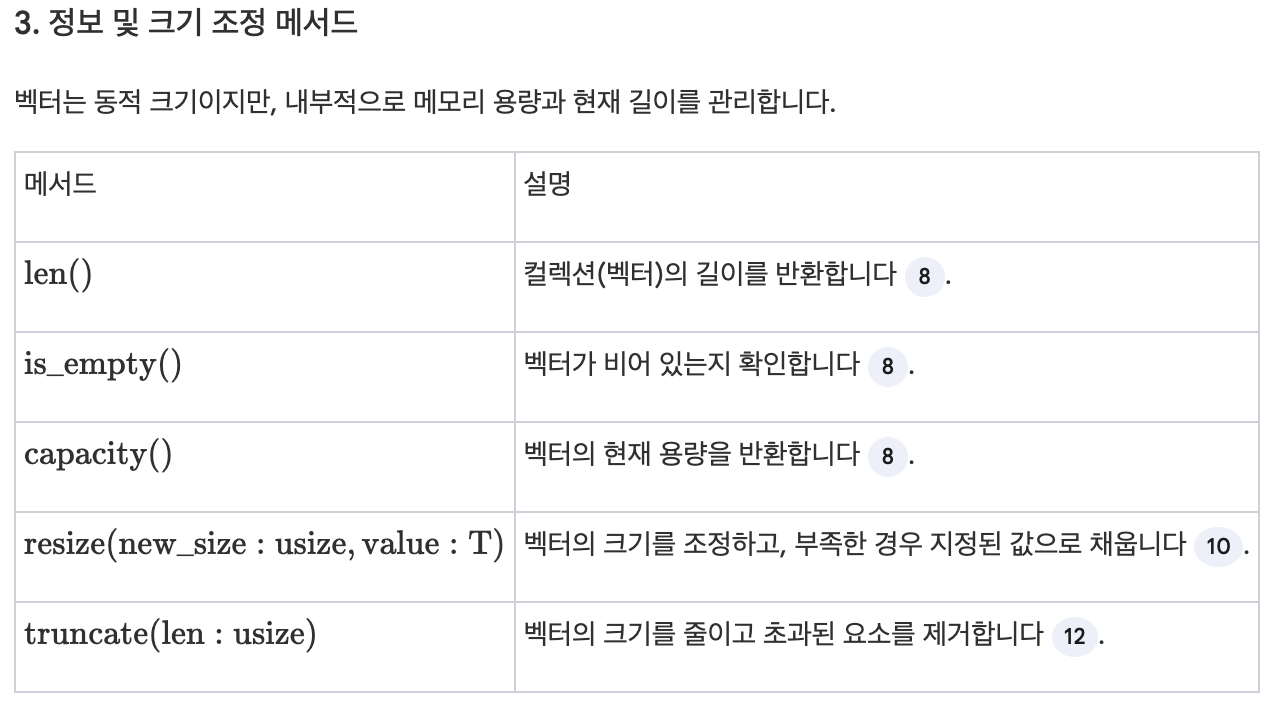

In [18]:
fn main() { 
    let v1 = vec![1, 2, 3];

    println!(" 여부 {}",v1.is_empty());
    println!(" 길이 {}",v1.len());
    println!(" 용량 {}",v1.capacity());
}
main();

 여부 false
 길이 3
 용량 3
